# Analyzing the performance of Contrimix and HistauGAN

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
!pip install seaborn

In [4]:
%matplotlib inline

In [5]:
from typing import Any, Dict, List, Tuple
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
contrimix_test_accuracy_by_seeds: Dict[str, List[float]] = {
    0: [0.965091884,0.973741174,0.945769787,0.963502288,0.94292742,0.942778051,0.907470524,0.971027195,0.965744376,0.940590203],
    1: [0.970078766,0.97969681,0.935922325,0.975416064,0.946033418,0.966543615,0.909567475,0.97607553,0.948240161,0.878355026],
    2: [0.995275617,0.98456955,0.925797522,0.972012103,0.950433552,0.980156898,0.890170395,0.99253732,0.964238644,0.937215507],
    3: [0.984251976,0.97103411,0.91581136,0.974659622,0.960269213,0.977388084,0.897247732,0.991220355,0.97085762,0.900722027],
    4: [0.980052471,0.980238199,0.952149808,0.958018184,0.936715424,0.969543159,0.869200528,0.986611068,0.954608202,0.901506841],
    5: [0.951181114,0.939361155,0.956171989,0.931543112,0.925067961,0.950392246,0.875753582,0.966856897,0.957588315,0.909590304],
    6: [0.953543305,0.922577143,0.943134546,0.925869882,0.911220372,0.931702793,0.869462669,0.942712903,0.963830829,0.933605373],
    7: [0.988188982,0.985110998,0.893481255,0.969553709,0.955480754,0.973465621,0.908256888,0.958735704,0.967501104,0.948909104],
    8: [0.955905497,0.976989686,0.934812784,0.964258671,0.940209627,0.965159178,0.912975073,0.965539932,0.958090246,0.919086456],
    9: [0.969816267,0.950460196,0.854923725,0.956694424,0.902808309,0.931933522,0.889646113,0.970807731,0.920979977,0.879924655],
}

In [7]:
histaugan_3_dom_acc_by_seeds: Dict[str, List[float]] = {
    0: [0.952,0.870,0.848,0.585,0.902,0.818,0.827,0.890,0.664,0.489],
    1: [0.963,0.909,0.853,0.856,0.916,0.931,0.815,0.943,0.831,0.553],
    2: [0.897,0.820,0.743,0.462,0.847,0.710,0.765,0.810,0.552,0.449],
    3: [0.950,0.875,0.885,0.564,0.913,0.727,0.810,0.901,0.786,0.514],
    4: [0.940,0.858,0.748,0.475,0.946,0.708,0.847,0.854,0.493,0.457],
}

In [8]:
histaugan_5_dom_acc_by_seeds: Dict[str, List[float]] = {
    0: [0.973,0.915,0.898,0.960,0.925,0.948,0.873,0.930,0.944,0.928],
    1: [0.990,0.956,0.894,0.933,0.935,0.957,0.853,0.961,0.914,0.873],
    2: [0.978,0.931,0.855,0.953,0.931,0.929,0.884,0.939,0.930,0.878],
    3: [0.978,0.930,0.900,0.944,0.925,0.943,0.864,0.941,0.939,0.908],
    4: [0.985,0.937,0.895,0.951,0.938,0.959,0.869,0.955,0.940,0.912],
}

In [9]:
FRACT_TO_PCT = 100.0

In [10]:
test_slide_numbers = ['slide 20', 'slide 21', 'slide 22', 'slide 23', 'slide 24', 'slide 25', 'slide 26', 'slide 27', 'slide 28', 'slide 29']
num_patches_per_slides = [3810, 3694, 7210, 5288, 7727, 4334, 3815, 4556, 31878, 12742]

In [11]:
def _compute_mean_acc_std_by_slides(acc_by_seed: Dict[str, List[float]]) -> Tuple[Dict[str, List[float]],Dict[str, List[float]]]:
    all_acc = np.array(list(acc_by_seed.values()))
    return {k: v for k, v in enumerate(all_acc.mean(axis=0) * FRACT_TO_PCT)}, {k: v for k, v in enumerate(all_acc.std(axis=0)*FRACT_TO_PCT)}

In [12]:
contrimix_mean_acc_by_seeds, contrimix_std_by_seeds = _compute_mean_acc_std_by_slides(acc_by_seed=contrimix_test_accuracy_by_seeds)
histaugan_3_dom_mean_acc_by_seeds, histaugan_3_dom_std_acc_by_seeds = _compute_mean_acc_std_by_slides(acc_by_seed=histaugan_3_dom_acc_by_seeds)
histaugan_5_dom_mean_acc_by_seeds, histaugan_5_dom_std_acc_by_seeds = _compute_mean_acc_std_by_slides(acc_by_seed=histaugan_5_dom_acc_by_seeds)

In [13]:
num_slides = len(test_slide_numbers)
angles = [n / float(num_slides) * 2 * np.pi for n in range(num_slides)]
angles.append(angles[0])

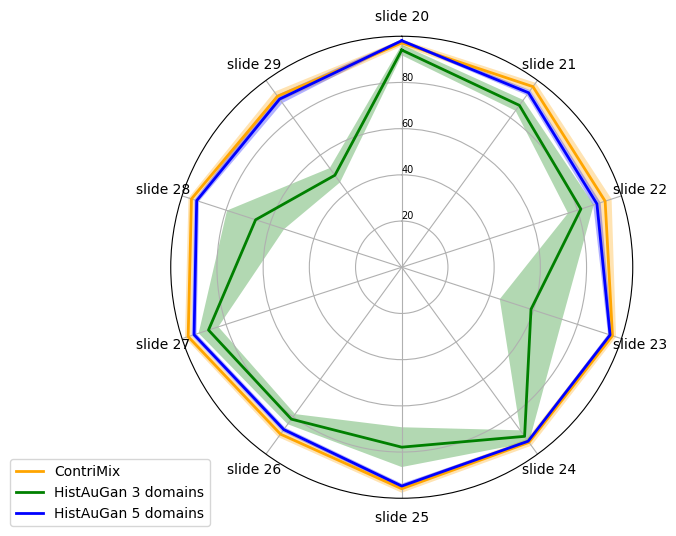

In [14]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# Set the first axis on the top
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
angles# Draw one axe per variable + add labels
plt.xticks(angles[:-1], test_slide_numbers)#

contrimix_avg_acc = list(contrimix_mean_acc_by_seeds.values())
contrimix_avg_acc.append(contrimix_avg_acc[0])
contrimix_avg_acc = np.array(contrimix_avg_acc)

contrimix_std_acc = list(contrimix_std_by_seeds.values())
contrimix_std_acc.append(contrimix_std_by_seeds[0])
contrimix_std_acc = np.array(contrimix_std_acc)

ax.plot(angles, contrimix_avg_acc, linewidth=2, linestyle='solid', label="ContriMix", color="orange")
ax.fill_between(angles, contrimix_avg_acc - contrimix_std_acc, contrimix_avg_acc + contrimix_std_acc, facecolor='orange', alpha=0.3)

histaugan_3_dom_avg_acc = list(histaugan_3_dom_mean_acc_by_seeds.values())
histaugan_3_dom_avg_acc.append(histaugan_3_dom_avg_acc[0])
histaugan_3_dom_avg_acc = np.array(histaugan_3_dom_avg_acc)

histaugan_3_dom_std_acc = list(histaugan_3_dom_std_acc_by_seeds.values())
histaugan_3_dom_std_acc.append(histaugan_3_dom_std_acc[0])
histaugan_3_dom_std_acc = np.array(histaugan_3_dom_std_acc)

ax.plot(angles, histaugan_3_dom_avg_acc, linewidth=2, linestyle='solid', label="HistAuGan 3 domains", color="green")
ax.fill_between(angles, histaugan_3_dom_avg_acc - histaugan_3_dom_std_acc, histaugan_3_dom_avg_acc + histaugan_3_dom_std_acc, facecolor='green', alpha=0.3)

histaugan_5_dom_avg_acc = list(histaugan_5_dom_mean_acc_by_seeds.values())
histaugan_5_dom_avg_acc.append(histaugan_5_dom_avg_acc[0])
histaugan_5_dom_avg_acc = np.array(histaugan_5_dom_avg_acc)

histaugan_5_dom_std_acc = list(histaugan_5_dom_std_acc_by_seeds.values())
histaugan_5_dom_std_acc.append(histaugan_5_dom_std_acc[0])
histaugan_5_dom_std_acc = np.array(histaugan_5_dom_std_acc)

ax.plot(angles, histaugan_5_dom_avg_acc, linewidth=2, linestyle='solid', label="HistAuGan 5 domains", color="blue")
ax.fill_between(angles, histaugan_5_dom_avg_acc - histaugan_5_dom_std_acc, histaugan_5_dom_avg_acc + histaugan_5_dom_std_acc, facecolor='blue', alpha=0.3)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([20,40,60,80], ["20","40","60","80"], color="black", size=7)
plt.ylim(0,100)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

In [15]:
# Part 2: Show some examples images from slide 29 and 23

In [18]:
# Run this cell twice if you've got an error in the first time.
from pathlib import Path
from ip_drit.datasets.camelyon17 import CamelyonDataset

In [19]:
DATASET_DIR = "/jupyter-users-home/tan-2enguyen/datasets"
wilds_dataset = CamelyonDataset(dataset_dir=Path(DATASET_DIR) / "camelyon17/", use_full_size=True, drop_centers=[])

Evaluation grouper created for the Camelyon dataset with 50 groups.


In [20]:
len(wilds_dataset)
import torch

In [21]:
def _get_sample_slide_images(slide_number: int, num_images: int, dataset: CamelyonDataset) -> List[np.ndarray]:
    metadata_arr = dataset.metadata_array
    matching_idxs = torch.where(metadata_arr[:,1] == slide_number)[0]
    num_match_slides = len(matching_idxs)
    select_idxs = torch.randperm(num_match_slides)[:num_images]
    return [np.array(dataset[matching_idxs[idx]][0]) for idx in select_idxs]
    

In [22]:
matched_images_slide_29 = _get_sample_slide_images(slide_number=29, num_images=8, dataset=wilds_dataset)
matched_images_slide_23 = _get_sample_slide_images(slide_number=23, num_images=8, dataset=wilds_dataset)
matched_images_slide_20 = _get_sample_slide_images(slide_number=20, num_images=8, dataset=wilds_dataset)
matched_images_slide_22 = _get_sample_slide_images(slide_number=22, num_images=8, dataset=wilds_dataset)

In [23]:
import torch
import pandas as pd

In [24]:
histaugan_3_doms_by_seeds: Dict[int, List[Path]] = {
    0: [
        Path("./contrimix_seed_0_perf/")]
}

In [25]:
def _prepare_prediction_data_frame_from_save_tensors(folder_path: str) -> pd.DataFrame:
    y_pred = torch.load(folder_path / "y_pred.pt").numpy()[:,np.newaxis]
    y_true = torch.load(folder_path / "y_true.pt").numpy()[:,np.newaxis]
    metadata = torch.load(folder_path / "metadata.pt").numpy()
    combined_arr = np.concatenate([metadata, y_pred, y_true], axis=1)
    return pd.DataFrame(data=combined_arr, index=combined_arr[:,3], columns=['hospital', 'slide_number', 'split', 'patch_idx','y_pred', 'y_true'])
    

In [27]:
df = _prepare_prediction_data_frame_from_save_tensors(folder_path=histaugan_3_doms_by_seeds[0][0])

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)

In [109]:
(df["y_pred"] == df["y_true"]).sum()

40121

In [110]:
def _find_misclassified_examples(slide_number: int, df: pd.DataFrame, num_images: int, dataset: CamelyonDataset) -> Tuple[List[np.ndarray], List[np.ndarray]]:
    """Returns a tuple of false positive and false negative examples."""
    false_pos_df = df.loc[(df['slide_number'] == slide_number) & df['y_pred'] & (~df['y_true'])]
    false_neg_df = df.loc[(df['slide_number'] == slide_number) & ~df['y_pred'] & df['y_true']]

    num_false_pos_patches = len(false_pos_df.index)
    select_idxs = torch.randperm(num_false_pos_patches)[:num_images]
    false_pos_ims = [np.array(dataset[false_pos_df.index[int(idx)]][0]) for idx in select_idxs]
    
    num_false_neg_patches = len(false_neg_df.index)
    select_idxs = torch.randperm(num_false_neg_patches)[:num_images]
    false_neg_ims = [np.array(dataset[false_neg_df.index[int(idx)]][0]) for idx in select_idxs]
    return false_pos_ims, false_neg_ims

In [115]:
false_pos_ims_slide_29, false_neg_ims_slide_29 = _find_misclassified_examples(slide_number=29, df=df, num_images=4, dataset=wilds_dataset)
false_pos_ims_slide_23, false_neg_ims_slide_23 = _find_misclassified_examples(slide_number=29, df=df, num_images=4, dataset=wilds_dataset)
false_pos_ims_slide_28, false_neg_ims_slide_28 = _find_misclassified_examples(slide_number=28, df=df, num_images=4, dataset=wilds_dataset)
false_pos_ims_slide_25, false_neg_ims_slide_25 = _find_misclassified_examples(slide_number=25, df=df, num_images=4, dataset=wilds_dataset)

In [116]:
def _plot_multiple_images(images_sets: List[List[np.ndarray]]) -> None:
    """Plot images from multiple slides, 1 per row."""
    num_images_per_slide = len(images_sets[0])
    num_slides = len(images_sets)
    FIGSIZE = 6
    plt.figure(figsize=(FIGSIZE, int(FIGSIZE * num_slides / num_images_per_slide)))
    combined_image = np.concatenate([np.concatenate(slide_slide_images, axis=1) for slide_slide_images in images_sets], axis=0)
    plt.imshow(combined_image)
    plt.axis(False)
    plt.show()

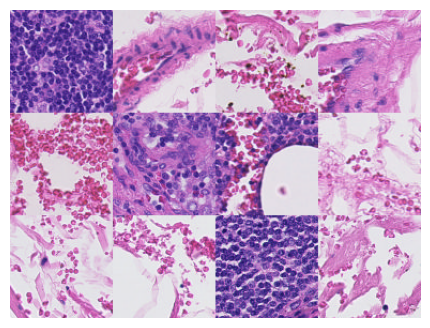

In [117]:
# Plot false positive images.
_plot_multiple_images(images_sets=[false_pos_ims_slide_29, false_pos_ims_slide_23, false_pos_ims_slide_28])

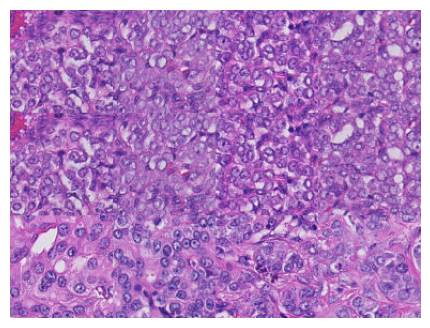

In [118]:
# Plot false negative images.
_plot_multiple_images(images_sets=[false_neg_ims_slide_29, false_neg_ims_slide_29, false_neg_ims_slide_28])

In [42]:
def _find_correctly_sclassified_examples(slide_number: int, df: pd.DataFrame, num_images: int, dataset: CamelyonDataset) -> Tuple[List[np.ndarray], List[np.ndarray]]:
    """Returns a tuple of true positive and true negative examples."""
    true_pos_df = df.loc[(df['slide_number'] == slide_number) & df['y_pred'] & df['y_true']]
    true_neg_df = df.loc[(df['slide_number'] == slide_number) & ~df['y_pred'] & ~df['y_true']]

    num_true_pos_patches = len(true_pos_df.index)
    select_idxs = torch.randperm(num_true_pos_patches)[:num_images]
    true_pos_ims = [np.array(dataset[true_pos_df.index[int(idx)]][0]) for idx in select_idxs]
    
    num_true_neg_patches = len(true_neg_df.index)
    select_idxs = torch.randperm(num_true_neg_patches)[:num_images]
    true_neg_ims = [np.array(dataset[true_neg_df.index[int(idx)]][0]) for idx in select_idxs]
    return true_pos_ims, true_neg_ims

In [45]:
true_pos_ims, true_neg_ims = _find_correctly_sclassified_examples(slide_number=29, df=df, num_images=8, dataset=wilds_dataset)

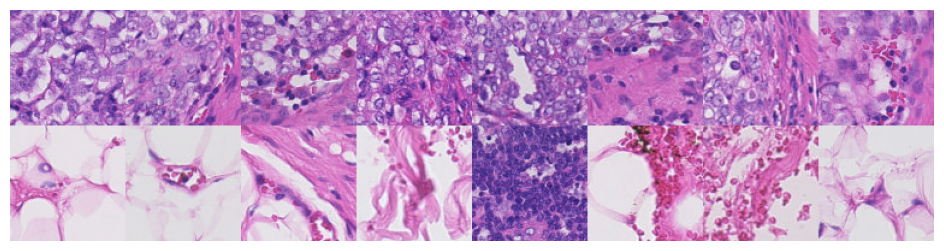

In [46]:
_plot_multiple_images(images_sets=[true_pos_ims, true_neg_ims])